Following the footsteps of Leon and later on removing the red edge stars. 

In [24]:
from shapely.geometry import Polygon, Point
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#plt.style.use("dark_background")

In [25]:
def linear1(x):
    return 21.653*x - 79.223 # why???

def linear2(x):
    return 16.104*x - 60.301

In [26]:
instab_strip = np.array([
    (4.013233923578759, 4.364864864864865),
    (4.007642124883512, 4.274774774774775),
    (4.003168685927315, 4.166666666666666),
    (3.9964585274930178, 4.062162162162162),
    (3.9908667287977706, 3.9756756756756753),
    (3.9875116495806227, 3.9),
    (3.9841565703634743, 3.8135135135135134),
    (3.9796831314072767, 3.7306306306306305),
    (3.9729729729729804, 3.6405405405405404),
    (3.967381174277733, 3.5792792792792794),
    (3.9595526561043877, 3.5144144144144143),
    (3.9561975768872393, 3.442342342342342),
    (3.9517241379310417, 3.3702702702702703),
    (3.9517241379310417, 3.3234234234234235),
    (3.947250698974844, 3.272972972972973),
    (3.9360671015843502, 3.2657657657657655),
    (3.927120223671955, 3.3054054054054056),
    (3.9260018639329055, 3.352252252252252),
    (3.9159366262814608, 3.40990990990991),
    (3.9058713886300165, 3.442342342342342),
    (3.892451071761424, 3.4387387387387385),
    (3.8868592730661766, 3.3954954954954957),
    (3.8812674743709294, 3.327027027027027),
    (3.8734389561975835, 3.272972972972973),
    (3.8622553588070896, 3.1864864864864866),
    (3.8499534016775465, 3.1396396396396398),
    (3.821994408201311, 3.1072072072072072),
    (3.801863932898422, 3.0999999999999996),
    (3.857781919850892, 4.3108108108108105),
    (3.8712022367194847, 4.292792792792793),
    (3.892451071761424, 4.303603603603603),
    (3.9136999068033624, 4.328828828828828),
    (3.9483690587138938, 4.354054054054053),
    (3.9785647716682275, 4.382882882882883),
    (4.005405405405413, 4.37567567567567),
    (4.013233923578759, 4.364864864864865),
])

In [27]:
instab_poly = Polygon(instab_strip)

In [28]:
grid_concatted = pd.read_pickle("grid_concatted.pkl")

logTeff = np.log10(grid_concatted["Teff"].values)
logg = grid_concatted["log_g"].values

print(f"Number of rows in the concatted grid: {grid_concatted.shape[0]}")
print(f"Outputs shape: {grid_concatted.shape}") # (rows, columns)

Number of rows in the concatted grid: 227100
Outputs shape: (227100, 33)


In [29]:
print(grid_concatted.columns)

Index(['Teff', 'log_g', 'F_l_0', 'F_l_1', 'F_l_2', 'O1_l_0', 'O1_l_1',
       'O1_l_2', 'O2_l_0', 'O2_l_1', 'O2_l_2', 'O3_l_0', 'O3_l_1', 'O3_l_2',
       'O4_l_0', 'O4_l_1', 'O4_l_2', 'O5_l_0', 'O5_l_1', 'O5_l_2', 'O6_l_0',
       'O6_l_1', 'O6_l_2', 'O7_l_0', 'O7_l_1', 'O7_l_2', 'O8_l_0', 'O8_l_1',
       'O8_l_2', 'O9_l_0', 'O9_l_1', 'O9_l_2', 'delta_nu'],
      dtype='object')


In [7]:
idx_outside = []
idx_inside = []

# for i, (lt, lg) in enumerate(zip(logTeff, logg)):
#     if instab_poly.contains(Point(lt, lg)):
#         idx_inside.append(i)
#     else:
#         idx_outside.append(i) 
        
for i, (lt, lg) in enumerate(zip(logTeff, logg)):
    if (lg < linear1(lt)) and (lg > linear2(lt)):
        idx_inside.append(i)
    else:
        idx_outside.append(i) 

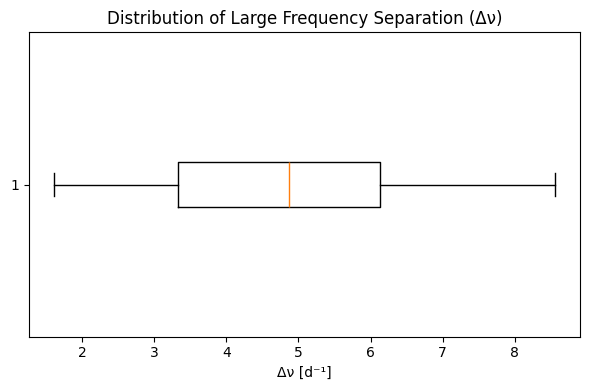

In [9]:
print(f"Number of points outside the instability strip: {len(idx_outside)}")
print(f"Percentage of points outside the instability strip: {len(idx_outside) / len(grid_concatted) * 100:.2f}%")

Number of points outside the instability strip: 73786
Percentage of points outside the instability strip: 32.49%


In [10]:
outputs_in_instab_strip = grid_concatted.iloc[idx_inside]
# very important for us because we do not actually want to have the effective temperature and the log g in our data!
outputs_in_instab_strip = outputs_in_instab_strip.drop(columns=["Teff", "log_g"])

In [11]:
outputs_in_instab_strip

,F_l_0,F_l_1,F_l_2,O1_l_0,O1_l_1,O1_l_2,O2_l_0,O2_l_1,O2_l_2,O3_l_0,...,O7_l_0,O7_l_1,O7_l_2,O8_l_0,O8_l_1,O8_l_2,O9_l_0,O9_l_1,O9_l_2,delta_nu
model_id,,,,,,,,,,,,,,,,,,,,,
27.0,12.4589,12.9110,18.1763,16.0482,16.5686,20.8079,19.9562,20.6688,23.4767,23.8965,...,40.1671,42.1812,44.1603,44.5310,46.6482,48.6374,48.9744,51.1573,53.1582,3.9790
28.0,12.7128,13.1432,18.4317,16.3744,16.9002,21.0982,20.3498,21.0779,23.8716,24.3448,...,40.7430,42.7862,44.7790,45.1517,47.3045,49.3143,49.6549,51.8782,53.9043,4.0101
29.0,12.9864,13.4006,18.6994,16.7266,17.2589,21.4097,20.7757,21.5228,24.3025,24.8337,...,41.4094,43.4862,45.4924,45.8662,48.0572,50.0866,50.4305,52.6961,54.7473,4.0580
30.0,13.2851,13.6874,18.9817,17.1114,17.6516,21.7469,21.2408,22.0112,24.7757,25.3698,...,42.1833,44.3014,46.3225,46.6969,48.9316,50.9815,51.3284,53.6405,55.7173,4.1294
31.0,13.6178,14.0115,19.2839,17.5402,18.0904,22.1187,21.7580,22.5573,25.3041,25.9664,...,43.0942,45.2657,47.3057,47.6804,49.9688,52.0423,52.3925,54.7590,56.8641,4.2178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182544.0,23.7453,24.4291,29.3737,30.4378,31.9293,35.1903,36.7179,39.5241,42.4936,43.5239,...,74.3461,78.1705,81.3798,82.0938,85.8733,89.1297,89.8941,93.6754,96.9894,7.7477
182545.0,23.7663,24.4509,29.3980,30.4646,31.9584,35.2206,36.7491,39.5595,42.5310,43.5615,...,74.4123,78.2402,81.4521,82.1669,85.9497,89.2086,89.9738,93.7583,97.0748,7.7546
182546.0,23.7686,24.4529,29.4037,30.4684,31.9610,35.2252,36.7542,39.5628,42.5354,43.5666,...,74.4186,78.2466,81.4591,82.1737,85.9567,89.2161,89.9810,93.7659,97.0828,7.7551


In [12]:
outputs_in_instab_strip.to_pickle("outputs_in_instab_strip.pkl")

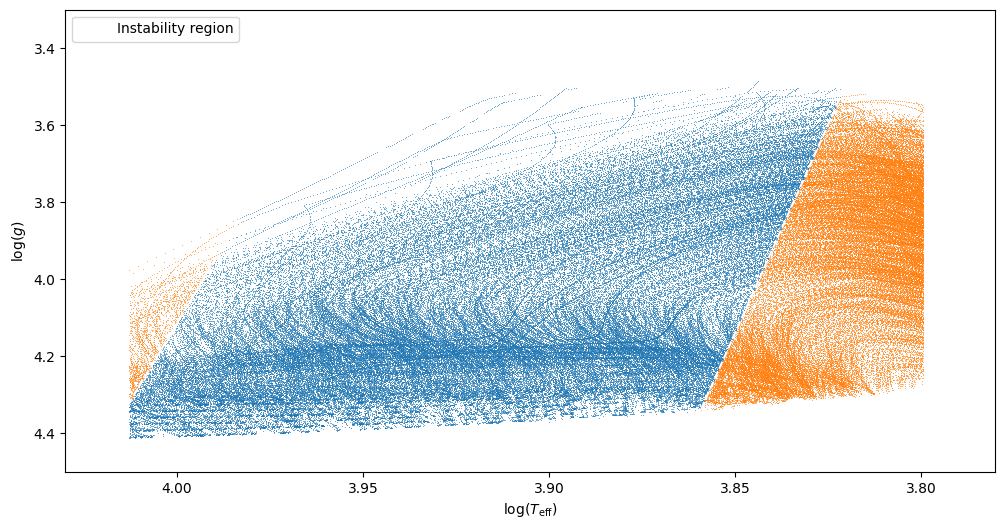

In [13]:
xlim = np.array([4.03, 3.78])

# fig, ax = plt.subplots(figsize=(6,5))
fig, ax = plt.subplots(figsize=(12, 6)) # talk
ax.plot(logTeff[idx_inside], logg[idx_inside], '.', alpha=1, ms=1, mew=0)
ax.plot(logTeff[idx_outside], logg[idx_outside], '.', alpha=1, ms=1, mew=0)
# ax.plot(xlim, linear1(xlim), color='black', linestyle='--', label="Instability region")
ax.plot(xlim, linear1(xlim), color='white', linestyle='--', label="Instability region") # talk
# ax.plot(xlim, linear2(xlim), color='black', linestyle='--')
ax.plot(xlim, linear2(xlim), color='white', linestyle='--') # talk
ax.set_xlim(*xlim)
ax.set_ylim(4.5, 3.3)
ax.set_xlabel(r"$\log(T_\mathrm{eff})$")
ax.set_ylabel(r"$\log(g)$")
ax.legend()

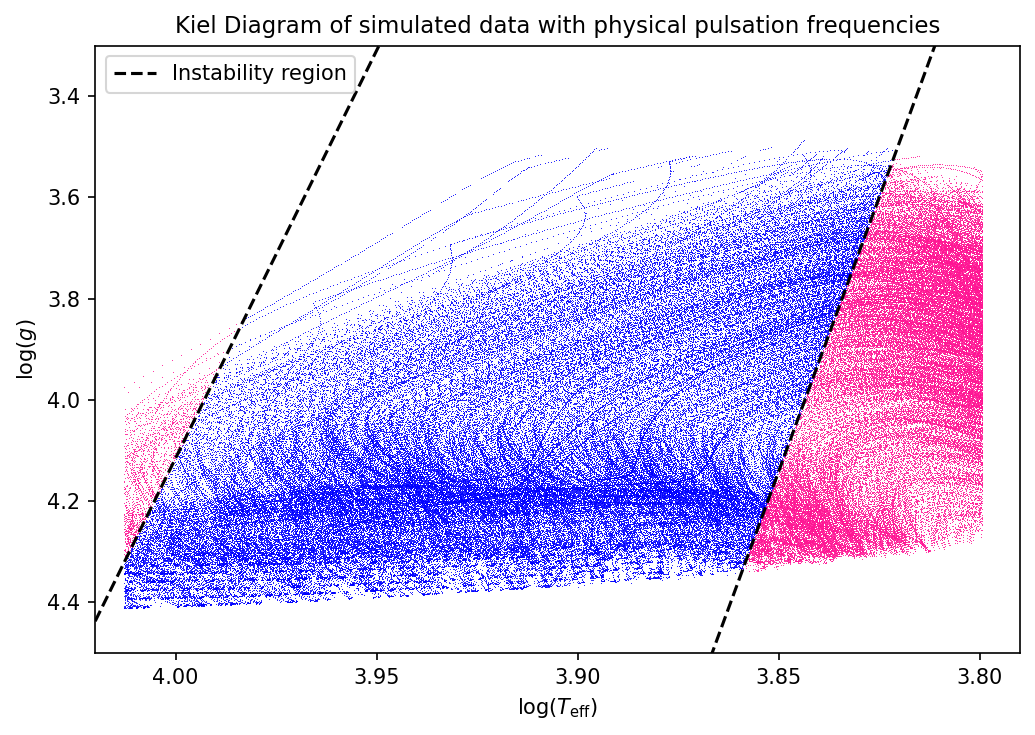

In [23]:
xlim = np.array([4.02, 3.79])

# fig, ax = plt.subplots(figsize=(6,5))
fig, ax = plt.subplots(figsize=(7,5), dpi=150) # talk
ax.plot(logTeff[idx_inside], logg[idx_inside], '.', alpha=1, ms=1, mew=0, color="blue")
ax.plot(logTeff[idx_outside], logg[idx_outside], '.', alpha=1, ms=1, mew=0, color="deeppink")
# ax.plot(xlim, linear1(xlim), color='black', linestyle='--', label="Instability region")
ax.plot(xlim, linear1(xlim), color='black', linestyle='--', label="Instability region") # talk
# ax.plot(xlim, linear2(xlim), color='black', linestyle='--')
ax.plot(xlim, linear2(xlim), color='black', linestyle='--') # talk
ax.set_xlim(*xlim)
ax.set_ylim(4.5, 3.3)
ax.set_title("Kiel Diagram of simulated data with physical pulsation frequencies", fontsize=11)
ax.set_xlabel(r"$\log(T_\mathrm{eff})$", fontsize=10)
ax.set_ylabel(r"$\log(g)$", fontsize=10)
ax.legend()

plt.tight_layout()
plt.savefig("kiel_diagram_thesis.png", dpi=150)  # ← Save the figure
plt.show() 